In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
url = "https://raw.githubusercontent.com/AlvitoDwiP/churn-analysis/main/churn/data/process/telco_churn_clean.csv"

df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


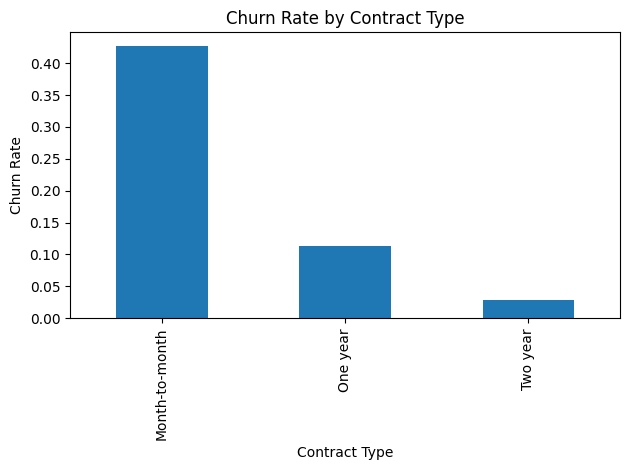

In [ ]:
churn_contract = (
    df.groupby('Contract')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

churn_contract['Yes'].plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
os.makedirs('visuals/charts', exist_ok=True)
plt.savefig('visuals/charts/churn_by_contract.png', dpi=150, bbox_inches='tight')
plt.tight_layout()


plt.show()


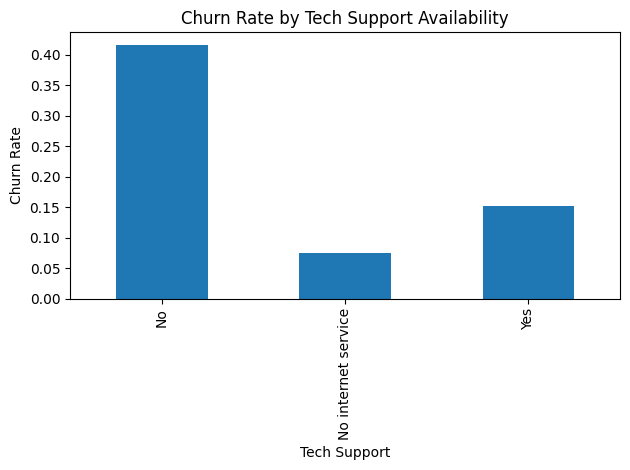

In [ ]:
churn_support = (
    df.groupby('TechSupport')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

churn_support['Yes'].plot(kind='bar')
plt.title('Churn Rate by Tech Support Availability')
plt.ylabel('Churn Rate')
plt.xlabel('Tech Support')
os.makedirs('visuals/charts', exist_ok=True)
plt.savefig('visuals/charts/churn_by_service.png', dpi=150, bbox_inches='tight')
plt.tight_layout()

plt.show()


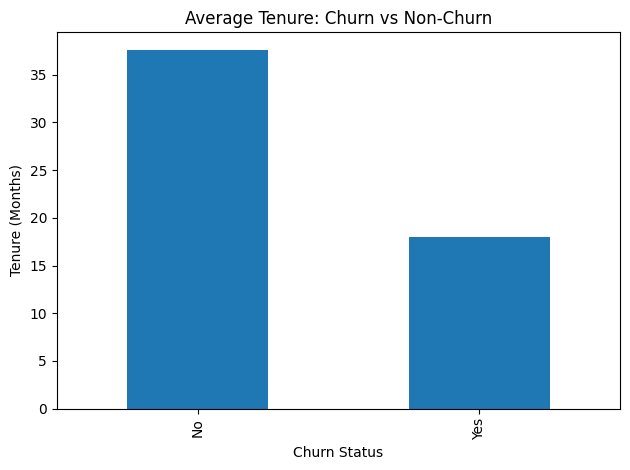

In [ ]:
df.groupby('Churn')['tenure'].mean().plot(kind='bar')
plt.title('Average Tenure: Churn vs Non-Churn')
plt.ylabel('Tenure (Months)')
plt.xlabel('Churn Status')
os.makedirs('visuals/charts', exist_ok=True)
plt.savefig('visuals/charts/tenure_churn_vs_nonchurn.png', dpi=150, bbox_inches='tight')
plt.tight_layout()

plt.show()

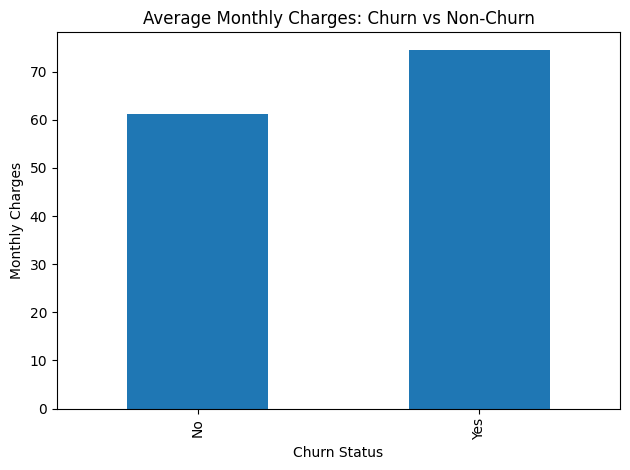

In [ ]:
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges: Churn vs Non-Churn')
plt.ylabel('Monthly Charges')
plt.xlabel('Churn Status')
os.makedirs('visuals/charts', exist_ok=True)
plt.savefig('visuals/charts/monthly_charges_churn_vs_nonchurn.png', dpi=150, bbox_inches='tight')
plt.tight_layout()
plt.show()
